In [1]:
from Graph import AdjacencyMatrix
import numpy as np
from sklearn.neighbors import NearestNeighbors
import networkx as nx
import pandas as pd 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import networkx as nx
from scipy.spatial import distance
import math
from numpy import linalg as LA
from decimal import *
from scipy.cluster.vq import vq, kmeans, whiten, kmeans2
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
feature=np.load('/Users/yongyizhao/Downloads/feature_matrix.npy')
df=np.load('/Users/yongyizhao/Downloads/adjacent_matrix_full.npz')['m'] 


In [4]:
features = pd.DataFrame(feature, columns = ['is_reject','num_of_appli','is_new_client','overdue_day','num_of_devices','num_of_phones',
                                            'last_7d_avg_call_in_duration','last_7d_avg_call_out_duration','is_overdue'])

In [5]:
rej = features[features['is_reject'] == 1.0] 
rej_ind = np.array(rej.index)

In [6]:
rej_ind= rej_ind.astype(int) 

In [40]:
default = df[rej_ind]
default = np.array([default[i][rej_ind] for i in range(len(df[rej_ind]))]) 

In [5]:
over3= features[features['overdue_day'] == 3.0]
over3_ind = np.array(over3.index) 
over3 = df[over3_ind]
over3 = np.array([over3[i][over3_ind] for i in range(len(df[over3_ind]))]) 

In [6]:
len(over3)

139

In [9]:
over4= features[features['overdue_day'] == 4.0]
over4_ind = np.array(over4.index) 
over4 = df[over4_ind] 
over4 = np.array([over4[i][over4_ind] for i in range(len(df[over4_ind]))])
over4 = over4.astype(int)

In [10]:
len(over4)

98

In [11]:
Object = AdjacencyMatrix(139) 

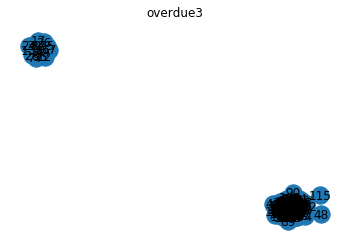

In [12]:
Object.plot_graph_1(over3, 'overdue3')

In [14]:
Object1 = AdjacencyMatrix(98) 

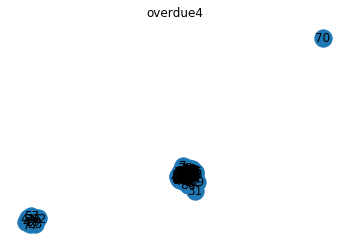

In [15]:
Object1.plot_graph_1(over4, 'overdue4')

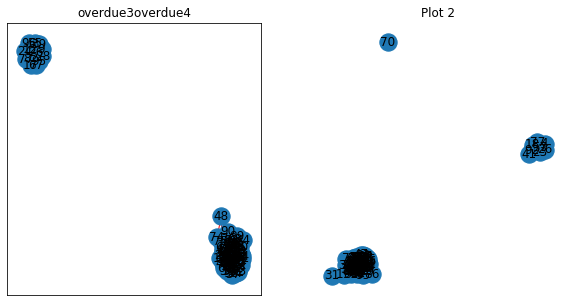

In [28]:
Object1.plot_graph_3(over3, over4,'overdue3' 'overdue4')

In [16]:
G = nx.Graph(over3)

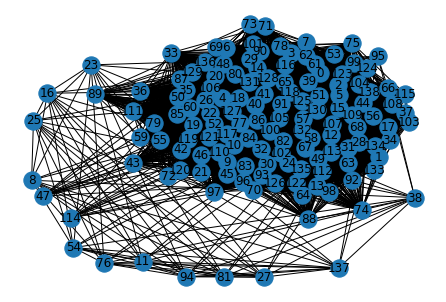

In [20]:
nx.draw(G,with_labels=True,pos=nx.spring_layout(G,k=2))
plt.draw()
plt.show() 

In [17]:
A = nx.adjacency_matrix(G)
adj_matrix = A.todense()

M = np.zeros(adj_matrix.shape)

row, col = adj_matrix.shape

for x in range(0,row):
    for y in range(x,col):
        M[x][y] = round((1 - distance.cosine(adj_matrix[:,x], adj_matrix[:,y])),2)        

tuples = []    
for (x,y), value in np.ndenumerate(M):
    if value!=0 and x!=y:
        tuples.append(((x+1,y+1),value))
   
C = sorted(tuples, key=lambda x: x[1])

t = np.count_nonzero(adj_matrix)
print(t)
C = C[-t:]

print(C)

13608
[((48, 115), 0.17), ((44, 48), 0.19), ((44, 115), 0.2), ((48, 60), 0.21), ((48, 73), 0.21), ((48, 98), 0.21), ((48, 135), 0.21), ((34, 48), 0.22), ((37, 48), 0.22), ((48, 72), 0.22), ((48, 112), 0.22), ((30, 48), 0.23), ((48, 56), 0.23), ((115, 134), 0.24), ((48, 139), 0.25), ((60, 115), 0.25), ((73, 115), 0.25), ((98, 115), 0.25), ((115, 135), 0.25), ((34, 115), 0.26), ((37, 115), 0.26), ((38, 115), 0.26), ((54, 115), 0.26), ((72, 115), 0.26), ((74, 115), 0.26), ((112, 115), 0.26), ((5, 115), 0.27), ((15, 48), 0.27), ((43, 48), 0.27), ((48, 49), 0.27), ((48, 94), 0.27), ((48, 137), 0.27), ((56, 115), 0.27), ((58, 115), 0.27), ((111, 115), 0.27), ((115, 116), 0.27), ((115, 118), 0.27), ((15, 115), 0.28), ((22, 48), 0.28), ((25, 115), 0.28), ((38, 48), 0.28), ((43, 115), 0.28), ((47, 115), 0.28), ((48, 64), 0.28), ((48, 80), 0.28), ((48, 97), 0.28), ((48, 131), 0.28), ((94, 115), 0.28), ((108, 115), 0.28), ((115, 127), 0.28), ((115, 130), 0.28), ((115, 137), 0.28), ((1, 48), 0.29)

In [18]:
class Node:
    def __init__(self, name):
        self.name = name
        self.left = None
        self.right = None
        self.parent = self
        self.vertices = []
        
        
class Tree:
    def __init__(self):
        self.root = None

def MakeSet(r):
    r.parent = r
    r.vertices.append(r.name)
    
def SetFind(r):
    while r.parent!=r:
        r = r.parent
    return r

def SetUnion(x,y):
    xRoot = x.parent
    yRoot =y.parent
    
    if xRoot.name != yRoot.name:
        r = Node("P"+ str(x.name) + str(y.name))
        r.left = x
        r.right = y
        x.parent = r
        y.parent = r
        r.vertices.extend(x.vertices)
        r.vertices.extend(y.vertices)
        return r
        

In [19]:
ln = len(C)
ln = ln-1

nodes = []
tree = Tree()

def print_Tree(root):
    if root==None:
        return
    print(root.vertices)
    print_Tree(root.left)
    print_Tree(root.right)
    
def print_nodes(nodes):
    for i in range(0,len(nodes)):
        print(nodes[i].name,nodes[i].parent.name)

for i in range(ln, -1, -1):
    vertices, value = C[i]
    i,j = vertices
    if not any(x.name == i for x in nodes):
        a = Node(i)
        MakeSet(a)
        nodes.append(a)
    if not any(x.name == j for x in nodes):
        a = Node(j)
        MakeSet(a)
        nodes.append(a)
    
    i = next((x for x in nodes if x.name == i), None)
    j = next((x for x in nodes if x.name == j), None)
    ri = SetFind(i)
    rj = SetFind(j)
    if ri.name != rj.name:
        tree.root = SetUnion(ri,rj)
        
print_Tree(tree.root)

[48, 74, 44, 32, 93, 120, 76, 121, 7, 30, 56, 80, 104, 22, 52, 64, 79, 99, 113, 43, 47, 8, 10, 41, 49, 57, 107, 3, 25, 59, 62, 78, 81, 85, 63, 86, 15, 94, 4, 105, 108, 114, 1, 5, 6, 11, 16, 20, 21, 23, 27, 29, 31, 33, 40, 42, 45, 50, 51, 53, 61, 66, 68, 69, 117, 83, 84, 103, 133, 92, 110, 124, 126, 132, 87, 101, 111, 118, 122, 128, 119, 106, 36, 58, 136, 137, 88, 131, 139, 129, 71, 91, 97, 2, 13, 14, 18, 35, 123, 38, 54, 70, 46, 127, 100, 125, 109, 116, 19, 60, 73, 98, 34, 37, 72, 112, 135, 134, 130, 65, 102, 75, 89, 90, 115]
[48, 74, 44, 32, 93, 120, 76, 121, 7, 30, 56, 80, 104, 22, 52, 64, 79, 99, 113, 43, 47, 8, 10, 41, 49, 57, 107, 3, 25, 59, 62, 78, 81, 85, 63, 86, 15, 94, 4, 105, 108, 114, 1, 5, 6, 11, 16, 20, 21, 23, 27, 29, 31, 33, 40, 42, 45, 50, 51, 53, 61, 66, 68, 69, 117, 83, 84, 103, 133, 92, 110, 124, 126, 132, 87, 101, 111, 118, 122, 128, 119, 106, 36, 58, 136, 137, 88, 131, 139, 129, 71, 91, 97, 2, 13, 14, 18, 35, 123, 38, 54, 70, 46, 127, 100, 125, 109, 116, 19, 60, 73

In [26]:

import numpy as np
import networkx as nx
from scipy.spatial import distance
import sys

#Structure for Nodes of Dendogram

class Node:
    def __init__(self, name):
        self.name = name
        self.left = None
        self.right = None
        self.parent = None
        self.num_edges = 0
        self.vertices = set()
        self.density = 0
        
        
class Tree:
	def __init__(self):
		self.root = None

	#Find Lowest Common Ancestor
	def findLCA_Node(self,src_node,dest_node):
		while src_node is not None:
			if dest_node.name in src_node.vertices:
				return src_node
			src_node = src_node.parent
		return None

	def print_Tree(self,root):
		if root==None:
			return
		print(root.vertices)
		self.print_Tree(root.left)
		self.print_Tree(root.right)

	def print_nodes(self,nodes):
		for i in range(0,len(nodes)):
			print(nodes[i].name,nodes[i].parent.name)

	def count_vertices_and_edges(self,edges_list,nodes_list):		
		"""
		Count all edges of nodes in a dendogram
		"""
		for edge in edges_list:
			lca_node = None
			#print edge[0],edge[1]
			#lca_node = self.findLCA_Node(next((x for x in nodes_list if x.name == edge[0]),None),next((y for y in nodes_list if y.name == edge[1]),None))
			src_node = nodes_list[edge[0]] if nodes_list.__contains__(edge[0]) else None
			dst_node = nodes_list[edge[1]] if nodes_list.__contains__(edge[1]) else None
			if src_node is not None and dst_node is not None:
				lca_node = self.findLCA_Node(src_node,dst_node )
			#print 'LCA:',lca_node
			if lca_node is not None:
				lca_node.num_edges = lca_node.num_edges + 1

	def count_vertices_and_edges_wrap(self,root):
		"""
		Summation of number of edges of children to parent
		"""
		if root.left != None and root.right != None:
			self.count_vertices_and_edges_wrap(root.left)
			self.count_vertices_and_edges_wrap(root.right)
		if root.left != None and root.right != None:
			root.num_edges = root.left.num_edges + root.right.num_edges + root.num_edges
			#print root.name, root.num_edges

	def compute_density(self,root):
		"""
		Computing Density of an undirected Graph
		"""
		if root.left is None and root.right is None:
			return 
		total_vertices = float(len(root.vertices))
		max_vertices = total_vertices*(total_vertices - 1)/2		
		root.density = root.num_edges/max_vertices
		self.compute_density(root.left)
		self.compute_density(root.right)

	def extract_sub_graph(self,root,min_density):
		"""
		Print nodes whose density is greater than Density threshold ,ie , min_density
		For other nodes look test the densities of their sub graphs/children
		"""
		if root is None:
			return
		if root.density > min_density:
			print( "Community Detected:",root.vertices)
		else:
			self.extract_sub_graph(root.left,min_density)
			self.extract_sub_graph(root.right,min_density)

def MakeSet(r):
	r.parent = None
	r.vertices.add(r.name)
	

def SetFind(r):
	while r.parent!=None:
		r = r.parent
	return r

# Building a new Node as Union of two sets
def SetUnion(x,y):
    r = Node("P"+ str(x.name) + str(y.name))
    r.left = x
    r.right = y
    x.parent = r
    y.parent = r
    r.vertices= r.vertices.union(x.vertices,y.vertices)        
    return r

min_threshold = 0.75

G = nx.Graph(over3)

A = nx.adjacency_matrix(G)
adj_matrix = A.todense()

M = np.zeros(adj_matrix.shape)

row, col = adj_matrix.shape

#Building similarity function matrix, ie, Cosine Function matrix of all Column Vectors

for x in range(0,row):
    for y in range(x,col):
        M[x][y] = round((1 - distance.cosine(adj_matrix[:,x], adj_matrix[:,y])),2)        

tuples = []    
#Considering only non zero values
for (x,y), value in np.ndenumerate(M):
    if value!=0 and x!=y:
        tuples.append(((x+1,y+1),value))

C = sorted(tuples, key=lambda x: x[1])
#print "done"
t = np.count_nonzero(adj_matrix)
#print(t)
C = C[-t:]

#print(C)
#print 'C done'

ln = len(C)
ln = ln-1

"""
* Building basic data structure to enable efficient implementation of algorithm

* Building a Tree from the largest cosine to smallest values

* Larger values imply lesser similarity, thus using a bottom up approach and building from low to high connected nodes
"""

nodes =dict()
tree = Tree()

for i in range(ln, -1, -1):
    vertices, value = C[i]
    i,j = vertices
    if nodes.__contains__(i) is False:
        a = Node(i)
        MakeSet(a)
        nodes[i] = a
    if nodes.__contains__(j) is False:
        a = Node(j)
        MakeSet(a)
        nodes[j]=a
    
    i = nodes[i]
    j = nodes[j]
    ri = SetFind(i)
    rj = SetFind(j)
    if ri.name != rj.name:
        tree.root = SetUnion(ri,rj)
        
"""
* Below Flow as Algorithm Specified in paper: 'Dense Subgraph Extraction with Application to  Community Detection'
"""
#Counting number of vertices and Edges
tree.count_vertices_and_edges(G.edges(),nodes)
#Summing up number of edges of children to parent
tree.count_vertices_and_edges_wrap(tree.root)
#Computing density of Tree Nodes
tree.compute_density(tree.root)
#Filtering Nodes as Per Density Threshold
tree.extract_sub_graph(tree.root,min_threshold)

Community Detected: {56, 80}
Community Detected: {86, 63}
Community Detected: {105, 4}
Community Detected: {128, 132, 133, 27, 29, 31, 33, 36, 40, 42, 45, 50, 51, 53, 61, 66, 68, 69, 83, 84, 87, 92, 101, 103, 106, 110, 111, 117, 118, 119, 122, 124, 126}
Community Detected: {91, 71}
Community Detected: {123, 35}
Community Detected: {46, 100, 70, 127}
Community Detected: {72, 112}
Community Detected: {65, 102}
